<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/E-Commerce%20Domain%20Analytics%20Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
!pip install gdown

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
!gdown 102LpTp0wVK6DPmwwQljYSBTPjUCIIql-

Downloading...
From: https://drive.google.com/uc?id=102LpTp0wVK6DPmwwQljYSBTPjUCIIql-
To: /content/price_optimsation_dataset.csv
100% 121k/121k [00:00<00:00, 94.9MB/s]


In [ ]:
data11 = pd.read_csv("price_optimsation_dataset.csv")

In [ ]:
!gdown 1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl

Downloading...
From: https://drive.google.com/uc?id=1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 92.4MB/s]


In [ ]:
data22 = pd.read_csv("Ecom_CRM_analysis.csv",encoding="latin-1")

## Loading Datasets & Changing Data Types

In [2]:
!gdown 1da0C0bzM_eyXLRRQ56EHz0kDzc1sYOUc

Downloading...
From: https://drive.google.com/uc?id=1da0C0bzM_eyXLRRQ56EHz0kDzc1sYOUc
To: /content/CustomersData.xlsx
100% 42.2k/42.2k [00:00<00:00, 54.2MB/s]


In [3]:
CustomersData = pd.read_excel("CustomersData.xlsx")

In [4]:
!gdown 1_-VvRXtcJuX5WpRqVeuGVNa_IfUAgOW8

Downloading...
From: https://drive.google.com/uc?id=1_-VvRXtcJuX5WpRqVeuGVNa_IfUAgOW8
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 18.2MB/s]


In [5]:
Discount_Coupon = pd.read_csv("Discount_Coupon.csv")

In [6]:
!gdown 1ctNiusdseIZ6Vrvy600oZmu5C1aTbYzV

Downloading...
From: https://drive.google.com/uc?id=1ctNiusdseIZ6Vrvy600oZmu5C1aTbYzV
To: /content/Marketing_Spend.csv
100% 8.67k/8.67k [00:00<00:00, 30.2MB/s]


In [7]:
Marketing_Spend = pd.read_csv("Marketing_Spend.csv")

In [8]:
!gdown 1dkV1EVylOCBXi_qtx4iMCxRKDHcbPVC9

Downloading...
From: https://drive.google.com/uc?id=1dkV1EVylOCBXi_qtx4iMCxRKDHcbPVC9
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 132MB/s]


In [9]:
Online_Sales = pd.read_csv("Online_Sales.csv")

In [10]:
!gdown 16Fl-Ddhdj1HhDl1TAmuRg0-RRsUb3X8X

Downloading...
From: https://drive.google.com/uc?id=16Fl-Ddhdj1HhDl1TAmuRg0-RRsUb3X8X
To: /content/Tax_amount.xlsx
100% 9.84k/9.84k [00:00<00:00, 28.7MB/s]


In [11]:
Tax_amount = pd.read_excel("Tax_amount.xlsx")

In [12]:
CustomersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [13]:
CustomersData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [14]:
Discount_Coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [15]:
Discount_Coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [16]:
Discount_Coupon.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [17]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [18]:
Marketing_Spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [19]:
Marketing_Spend.Date = pd.to_datetime(Marketing_Spend["Date"])
Marketing_Spend["Month"] = Marketing_Spend.Date.dt.strftime("%b")

In [20]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
 3   Month          365 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.5+ KB


In [21]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [22]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [23]:
Online_Sales.Transaction_Date = pd.to_datetime(Online_Sales["Transaction_Date"])
Online_Sales["Transaction_Month"] = Online_Sales.Transaction_Date.dt.strftime("%b")

In [24]:
Online_Sales["Transaction_Month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [25]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [26]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan


In [27]:
Tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [28]:
Tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


## Creating Combined Data set

* Merging Online Sales & Discount Coupon into "Data"

In [29]:
data = Online_Sales.merge(Discount_Coupon,how = "left", left_on = ["Product_Category","Transaction_Month"],right_on = ["Product_Category","Month"])

* Merging "data" & Tax_amount

In [30]:
data = data.merge(Tax_amount, how ="left", on = "Product_Category")

* Merging "data" & CustomerData

In [31]:
data = data.merge(CustomersData, how ="left", on = "CustomerID")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
 11  Month                52524 non-null  object        
 12  Coupon_Code          52524 non-null  object        
 13  Discount_pct         52524 non-

In [33]:
data.drop("Month", axis=1,inplace = True)

## Calculating Invoice amount

In [34]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,M,Chicago,12


In [35]:
data["Coupon_Status"].value_counts()

Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

* Lets Assume "Clicked" means "Used"

In [36]:
data["Coupon_Status"]= data["Coupon_Status"].transform(lambda x : 1 if x in ["Clicked","Used"] else 0)

In [37]:
data["Coupon_Status"].value_counts()

Coupon_Status
1    44830
0     8094
Name: count, dtype: int64

In [38]:
data["Discount_pct"] = data["Discount_pct"].transform(lambda x : x/100)

In [39]:
data["Invoice_value"] = ((data["Quantity"] * data["Avg_Price"] * (1 - (data["Discount_pct"] * data["Coupon_Status"]))) * (1+data["GST"])) + data["Delivery_Charges"]

In [40]:
data["Invoice_value"].describe()

count    52524.000000
mean        92.165260
std        158.511119
min          4.375440
25%         18.828960
50%         41.672580
75%        123.810000
max       8979.275000
Name: Invoice_value, dtype: float64

In [41]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,1,Jan,OFF10,0.1,0.10,M,Chicago,12,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,0,Jan,SALE10,0.1,0.18,M,Chicago,12,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,1,Jan,AIO10,0.1,0.18,M,Chicago,12,24.0230


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  int64         
 10  Transaction_Month    52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  float64       
 13  GST                  52924 non-

In [43]:
# 0 --> Monday , 6 --> Sunday
data["weekday"] = data["Transaction_Date"].dt.weekday

In [44]:
data["month"] =data["Transaction_Date"].dt.month

In [45]:
data.duplicated().sum()

0

* No Duplicates records Found

## EDA

In [46]:
data.nunique()

CustomerID              1468
Transaction_ID         25061
Transaction_Date         365
Product_SKU             1145
Product_Description      404
Product_Category          20
Quantity                 151
Avg_Price                546
Delivery_Charges         267
Coupon_Status              2
Transaction_Month         12
Coupon_Code               45
Discount_pct               3
GST                        4
Gender                     2
Location                   5
Tenure_Months             49
Invoice_value          11985
weekday                    7
month                     12
dtype: int64

## Invoice amount

In [47]:
data["Invoice_value"].describe()

count    52524.000000
mean        92.165260
std        158.511119
min          4.375440
25%         18.828960
50%         41.672580
75%        123.810000
max       8979.275000
Name: Invoice_value, dtype: float64

<Axes: xlabel='Invoice_value'>

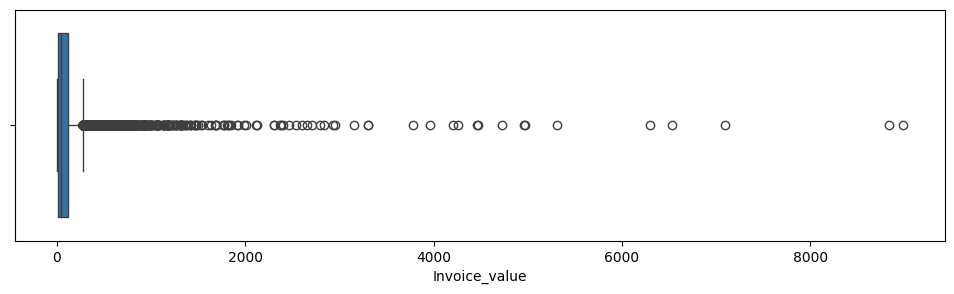

In [48]:
plt.figure(figsize =(12,3))
sns.boxplot(x= data["Invoice_value"])

In [49]:
# Total Revenue
np.round(data["Invoice_value"].sum(axis = 0))

4840888.0

In [50]:
# Average Revenue per month
np.round(data["Invoice_value"].sum(axis = 0)/12)

403407.0

In [51]:
data.groupby("Transaction_Month")["Invoice_value"].sum()

Transaction_Month
Apr    448532.73274
Aug    429508.62784
Dec    467526.63756
Feb    335488.07894
Jan    466692.14849
Jul    426475.32089
Jun    306218.41837
Mar    350379.04421
May    324055.17116
Nov    492131.11102
Oct    455597.80052
Sep    338283.03822
Name: Invoice_value, dtype: float64

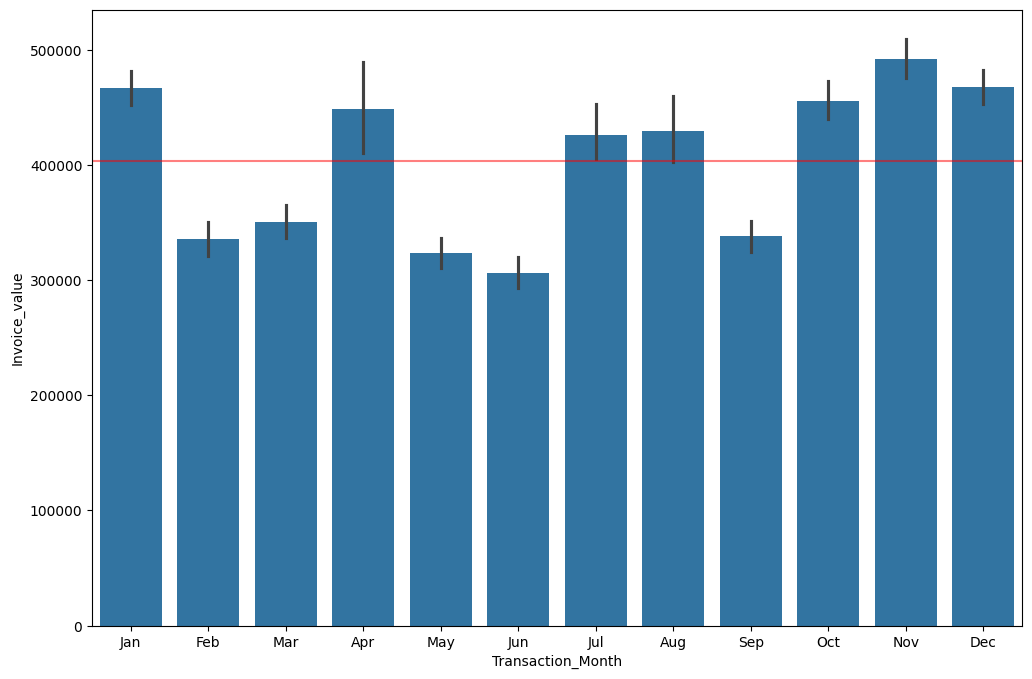

In [52]:
# Average Order value Month Wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=data, x="Transaction_Month", y="Invoice_value", estimator = np.sum)
#drawing average line
ax.axhline(np.round(data["Invoice_value"].sum(axis = 0))/12, color='red', alpha = 0.5)

In [53]:
data["Transaction_ID"].nunique()

25061

In [54]:
data.groupby("Transaction_Month")["Transaction_ID"].nunique()

Transaction_Month
Apr    1813
Aug    2414
Dec    2684
Feb    1664
Jan    2102
Jul    2080
Jun    1940
Mar    1991
May    2034
Nov    2282
Oct    2125
Sep    1932
Name: Transaction_ID, dtype: int64

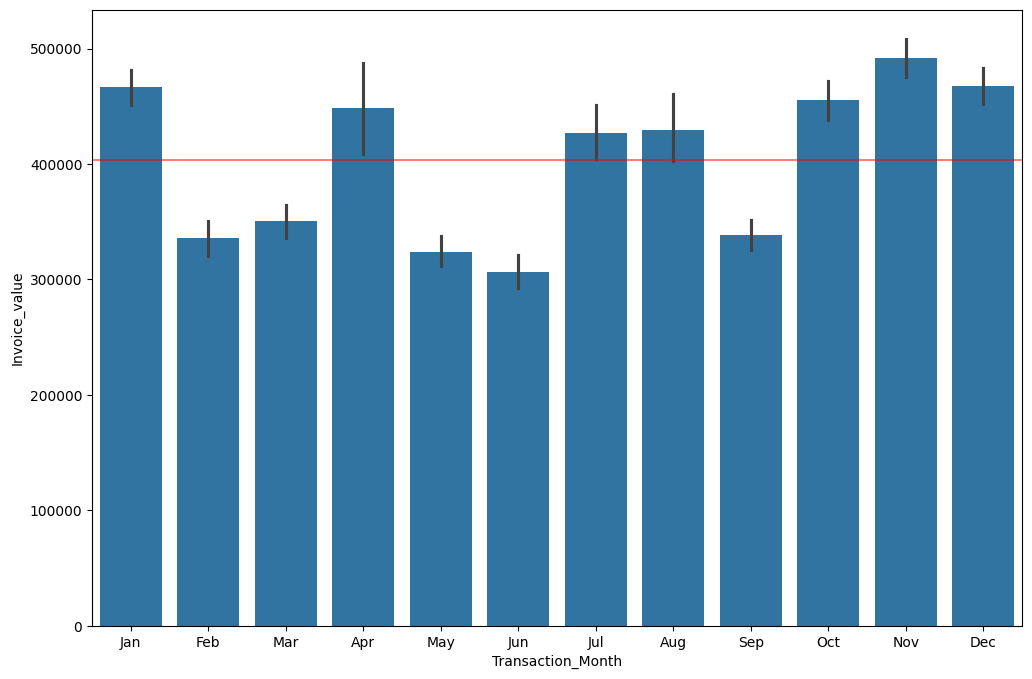

In [55]:
# Total Invoice Values Month wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=data, x="Transaction_Month", y="Invoice_value", estimator = np.sum)
#drawing average line
ax.axhline(data["Invoice_value"].sum(axis =0)/12, color='red', alpha = 0.5)

## Average Order Value

In [ ]:
data["Invoice_value"].sum(axis =0)/data["Transaction_ID"].nunique()

193.16420453932406

In [ ]:
A = data.groupby(["Transaction_Month","Transaction_ID"])["Invoice_value"].sum()
A = A.reset_index()
A

,Transaction_Month,Transaction_ID,Invoice_value
0,Apr,24593,43.04100
1,Apr,24594,700.42832
2,Apr,24595,170.40000
3,Apr,24596,84.71000
4,Apr,24597,261.71000
...,...,...,...
25056,Sep,39470,36.80300
25057,Sep,39471,9.66765
25058,Sep,39472,47.98380
25059,Sep,39473,152.26500


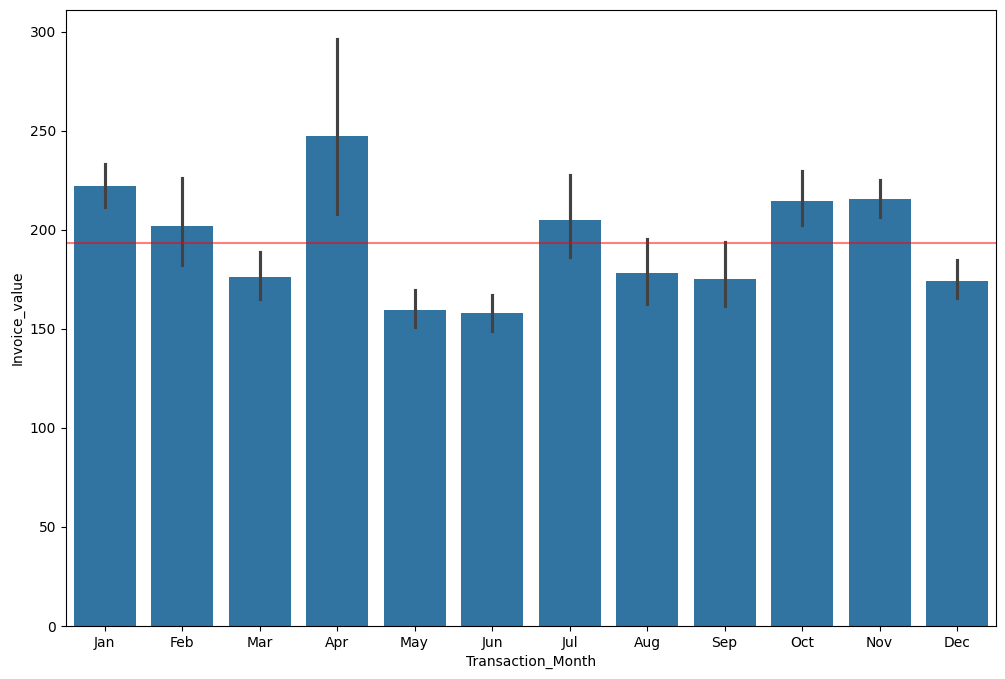

In [ ]:
# Average Order value Month Wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=A, x="Transaction_Month", y="Invoice_value", estimator = np.mean,order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data["Invoice_value"].sum(axis =0)/data["Transaction_ID"].nunique(), color='red', alpha = 0.5)

## No of Orders

In [ ]:
data["Transaction_ID"].nunique()

25061

In [ ]:
A = data.groupby("Transaction_Month")["Transaction_ID"].nunique().reset_index()
A

,Transaction_Month,Transaction_ID
0,Apr,1813
1,Aug,2414
2,Dec,2684
3,Feb,1664
4,Jan,2102
5,Jul,2080
6,Jun,1940
7,Mar,1991
8,May,2034
9,Nov,2282


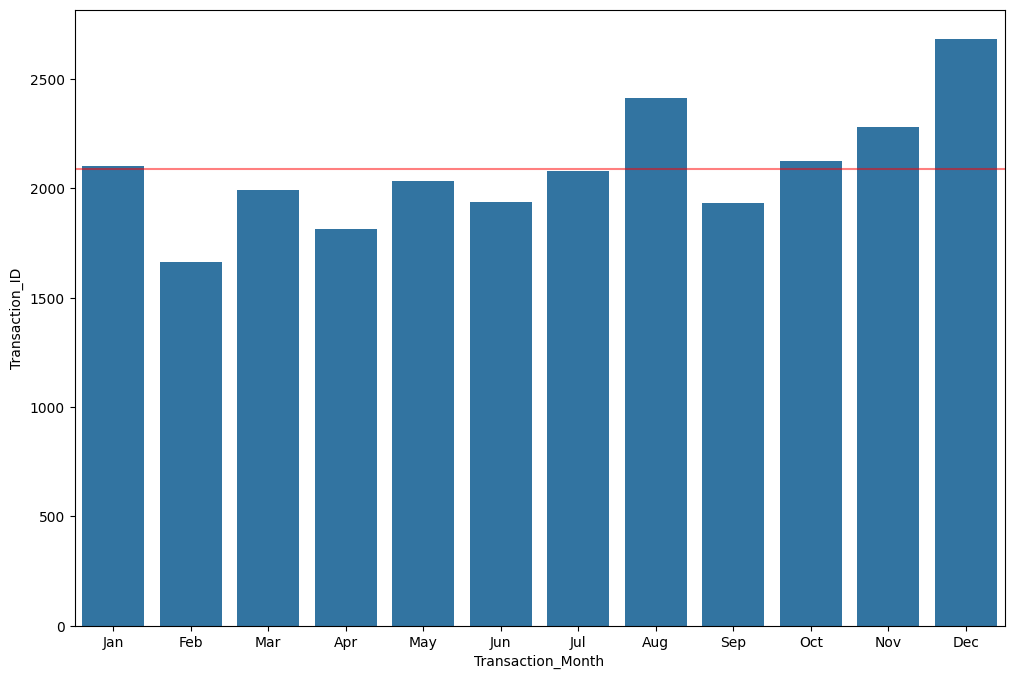

In [ ]:
# No of Orders Month Wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data = A, x ="Transaction_Month",y = "Transaction_ID", order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data["Transaction_ID"].nunique()/12, color='red', alpha = 0.5)

## No of Customers

In [ ]:
data["CustomerID"].nunique()

1468

In [ ]:
A = data.groupby("Transaction_Month")["CustomerID"].nunique().reset_index()
A

,Transaction_Month,CustomerID
0,Apr,224
1,Aug,300
2,Dec,236
3,Feb,109
4,Jan,215
5,Jul,236
6,Jun,259
7,Mar,208
8,May,200
9,Nov,188


In [ ]:
# Average No of Customer Visting
data.groupby("Transaction_Month")["CustomerID"].nunique().sum(axis=0)/12

214.83333333333334

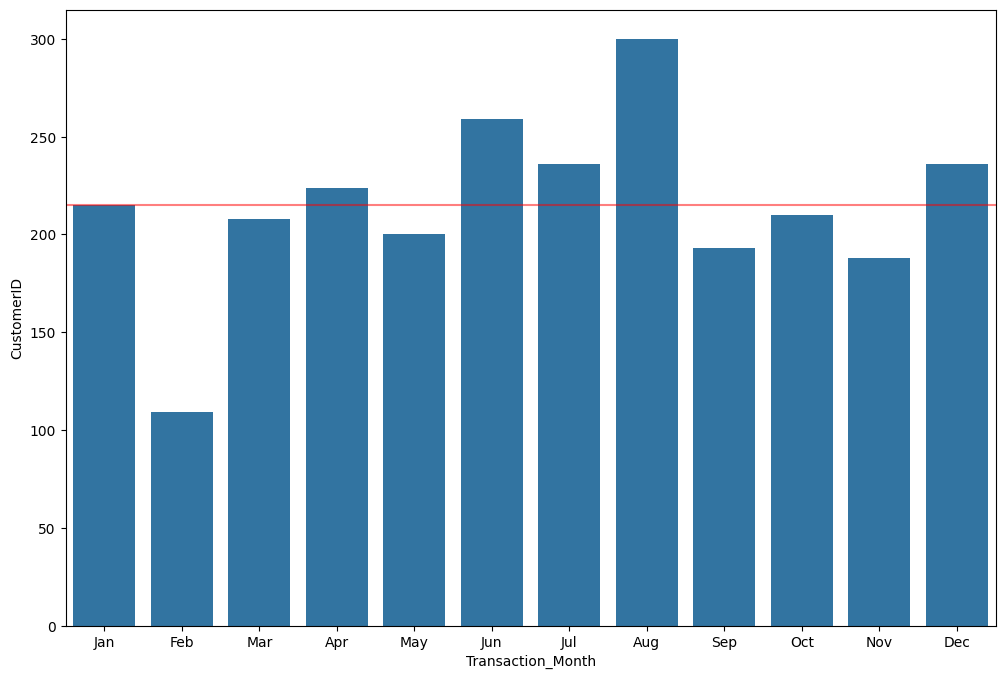

In [ ]:
# No of Customer Visiting Each month
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data = A, x ="Transaction_Month",y = "CustomerID", order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data.groupby("Transaction_Month")["CustomerID"].nunique().sum(axis=0)/12, color='red', alpha = 0.5)

## Customer OnBoarding & Attrition in the Given year

In [77]:
A = data.groupby("CustomerID").aggregate({"month":[min,max]}).reset_index()
A.columns = ["CustomerID","firstmonth","lastmonth"]
A

,CustomerID,firstmonth,lastmonth
0,12346,9,9
1,12347,3,11
2,12348,6,10
3,12350,12,12
4,12356,9,9
...,...,...,...
1463,18259,4,4
1464,18260,6,10
1465,18269,4,6
1466,18277,10,10


In [57]:
A.groupby("firstmonth")["CustomerID"].count()

firstmonth
1     215
2      96
3     177
4     163
5     112
6     137
7      94
8     135
9      78
10     87
11     68
12    106
Name: CustomerID, dtype: int64

<Axes: xlabel='firstmonth'>

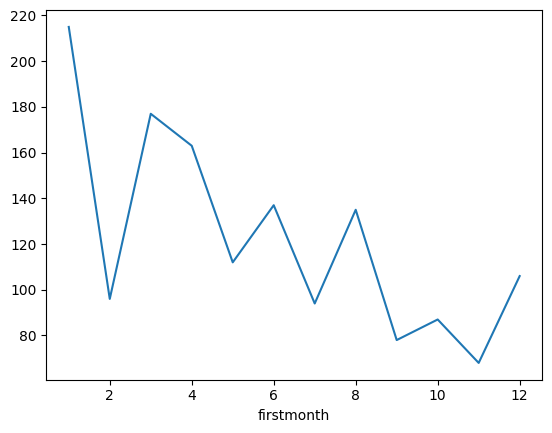

In [58]:
# No of New Customer Joined in Each Month
A.groupby("firstmonth")["CustomerID"].count().plot()

In [59]:
A.groupby("lastmonth")["CustomerID"].count()

lastmonth
1      96
2      31
3      74
4      99
5      83
6     118
7     113
8     166
9     138
10    154
11    160
12    236
Name: CustomerID, dtype: int64

<Axes: xlabel='lastmonth'>

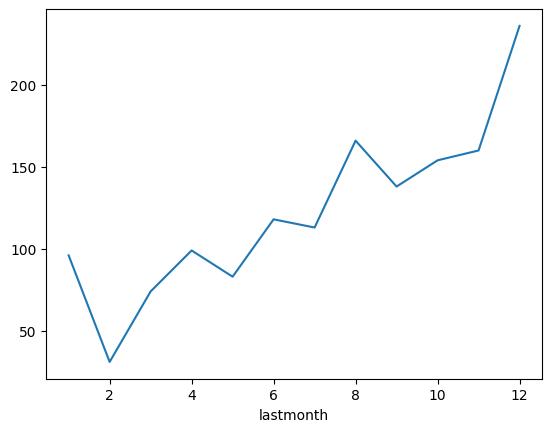

In [60]:
# No of Customer who dropped off in each month
A.groupby("lastmonth")["CustomerID"].count().plot()

## Cohort Analysis

In [102]:
A = data.groupby("CustomerID").aggregate({"month":[min,max]}).reset_index()
A.columns = ["CustomerID","firstmonth","lastmonth"]
A

,CustomerID,firstmonth,lastmonth
0,12346,9,9
1,12347,3,11
2,12348,6,10
3,12350,12,12
4,12356,9,9
...,...,...,...
1463,18259,4,4
1464,18260,6,10
1465,18269,4,6
1466,18277,10,10


In [103]:
Z = CustomersData.merge(A, on ="CustomerID")

In [104]:
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth
0,17850,M,Chicago,12,1,1
1,13047,M,California,43,1,12
2,12583,M,Chicago,33,1,8
3,13748,F,California,30,1,1
4,15100,M,California,49,1,8
...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12
1464,12956,F,Chicago,48,12,12
1465,15781,M,New Jersey,19,12,12
1466,14410,F,New York,45,12,12


In [97]:
B=data.groupby("CustomerID").aggregate({"Transaction_Date":[min,max]}).reset_index()
B.columns = ["CustomerID","firsttransaction","Lasttrasaction"]
B

,CustomerID,firsttransaction,Lasttrasaction
0,12346,2019-09-15,2019-09-15
1,12347,2019-03-24,2019-11-02
2,12348,2019-06-22,2019-10-19
3,12350,2019-12-14,2019-12-14
4,12356,2019-09-15,2019-09-15
...,...,...,...
1463,18259,2019-04-05,2019-04-05
1464,18260,2019-06-22,2019-10-05
1465,18269,2019-04-05,2019-06-20
1466,18277,2019-10-23,2019-10-23


In [105]:
Z = Z.merge(B, on ="CustomerID")

In [106]:
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26
1,13047,M,California,43,1,12,2019-01-01,2019-12-18
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02
3,13748,F,California,30,1,1,2019-01-01,2019-01-01
4,15100,M,California,49,1,8,2019-01-01,2019-08-30
...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31


In [92]:
C=data.groupby("CustomerID")["Transaction_ID"].nunique()
C

CustomerID
12346     1
12347    31
12348     8
12350    11
12356    13
         ..
18259     3
18260    19
18269     2
18277     1
18283    53
Name: Transaction_ID, Length: 1468, dtype: int64

In [107]:
Z = Z.merge(C, on ="CustomerID")

In [109]:
Z.rename(columns = {'Transaction_ID':'No of Transactions'}, inplace = True)
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6
...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6


In [110]:
Z["ActiveDays"] =(Z["Lasttrasaction"]-Z["firsttransaction"])/np.timedelta64(1, 'D')
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,0.0
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0
...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,0.0
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,0.0
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,0.0


<Axes: xlabel='ActiveDays', ylabel='Count'>

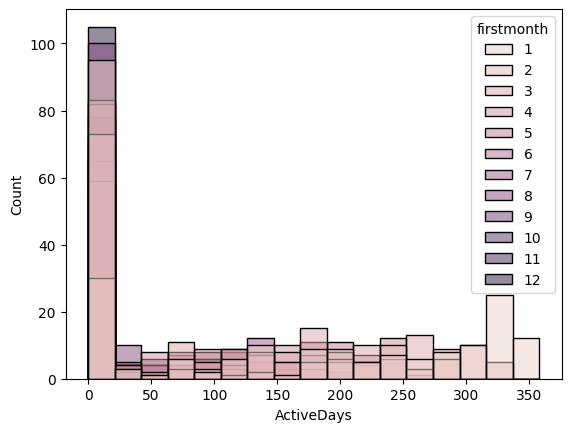

In [116]:
sns.histplot(data = Z, x="ActiveDays", hue = "firstmonth")

<Axes: ylabel='ActiveDays'>

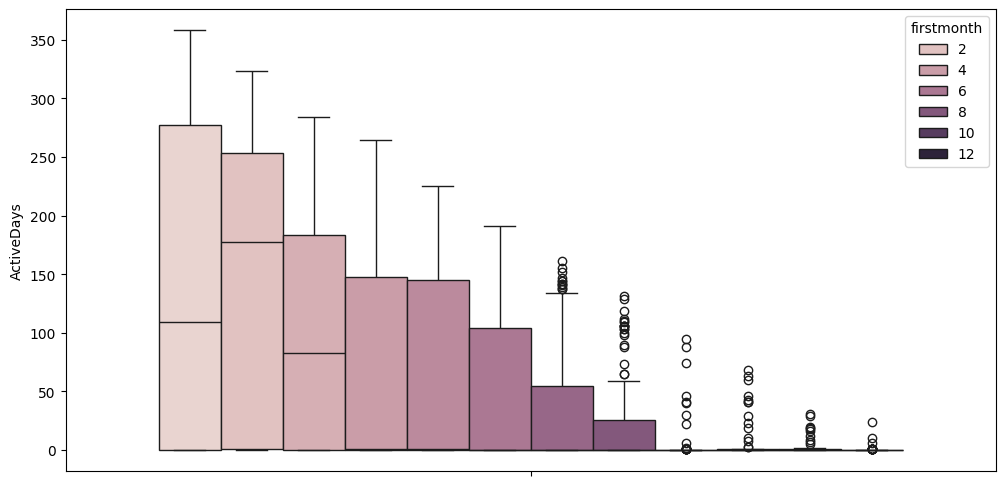

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(data = Z, y="ActiveDays", hue = "firstmonth")

In [129]:
Z.groupby("firstmonth").aggregate({"ActiveDays":[min,max]})

ActiveDays       
                  min    max
firstmonth                  
1                 0.0  358.0
2                 0.0  323.0
3                 0.0  284.0
4                 0.0  264.0
5                 0.0  225.0
6                 0.0  191.0
7                 0.0  161.0
8                 0.0  131.0
9                 0.0   95.0
10                0.0   68.0
11                0.0   31.0
12                0.0   24.0

In [130]:
Z.groupby("firstmonth")["ActiveDays"].median()

firstmonth
1     109.0
2     177.5
3      83.0
4       1.0
5       1.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
Name: ActiveDays, dtype: float64

## Average time between Orders for Customer

In [132]:
# If Customer bought only once in agiven year considering customer for frequency of 1 in 365 days
Z["ActiveDays"]= Z["ActiveDays"].transform(lambda x : x if x!= 0.0 else 365)
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,365.0
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0
...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,365.0
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,365.0
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,365.0


<Axes: xlabel='ActiveDays', ylabel='No of Transactions'>

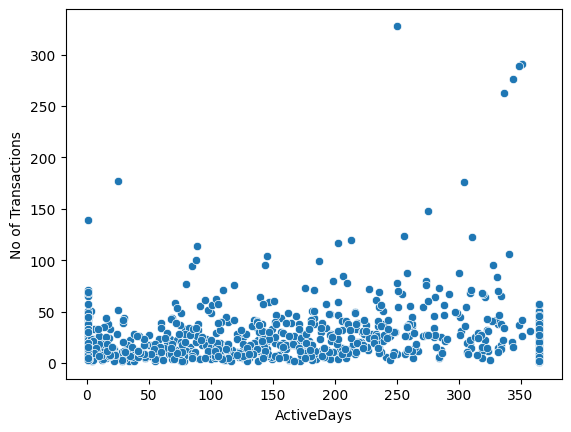

In [133]:
sns.scatterplot(data=Z, x ="ActiveDays", y="No of Transactions")

In [135]:
Z["AveOrderDays"] = Z["ActiveDays"]/Z["No of Transactions"]

In [136]:
Z["AveOrderDays"].describe()

count    1468.000000
mean       62.238642
std       101.646725
min         0.007194
25%         5.107724
50%        19.210526
75%        60.833333
max       365.000000
Name: AveOrderDays, dtype: float64

<Axes: xlabel='AveOrderDays'>

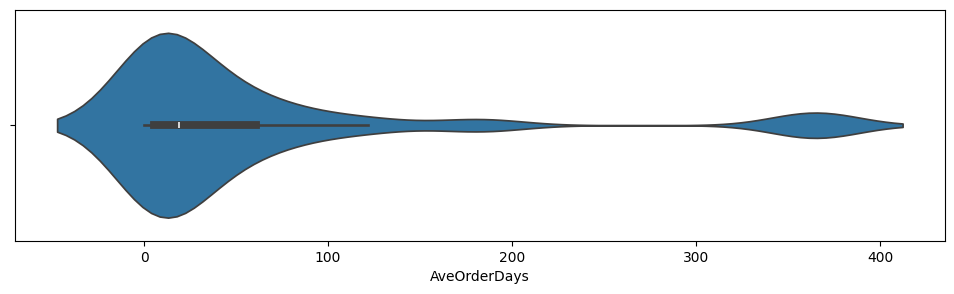

In [137]:
plt.figure(figsize=(12,3))
sns.violinplot(x= Z["AveOrderDays"])

## Average ordervalue by Customer

In [138]:
D = data.groupby("CustomerID")["Invoice_value"].sum()

In [139]:
Z = Z.merge(D,on ="CustomerID")
Z.rename(columns = {'Invoice_value':'TotalSpent'}, inplace = True)
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays,AveOrderDays,TotalSpent
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0,0.141243,38167.74663
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0,13.500000,2957.89355
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0,14.200000,3113.65770
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,365.0,365.000000,7.81688
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0,40.166667,904.97624
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0,0.200000,465.20604
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,365.0,26.071429,2610.29915
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,365.0,121.666667,599.78042
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,365.0,60.833333,931.03157


In [140]:
Z["AveOrderamount"] = Z["TotalSpent"]/Z["No of Transactions"]

In [141]:
Z["AveOrderamount"].describe()

count    1468.000000
mean      175.719487
std       162.731597
min         6.990000
25%       118.042832
50%       158.655245
75%       199.481945
max      4502.186540
Name: AveOrderamount, dtype: float64

<Axes: xlabel='AveOrderamount'>

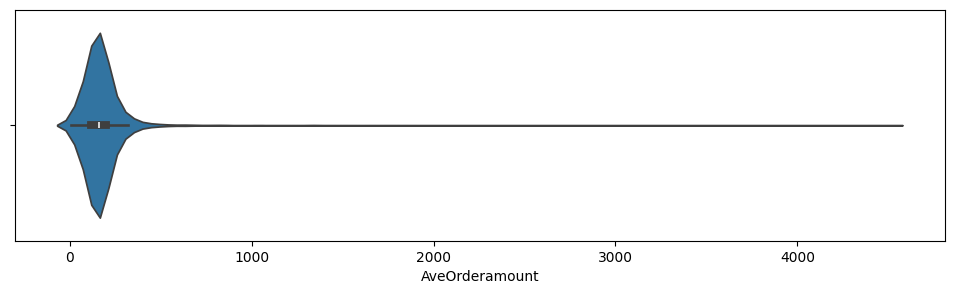

In [143]:
plt.figure(figsize=(12,3))
sns.violinplot(x= Z["AveOrderamount"])

## Customer Gender Wise analysis

In [148]:
Z["Gender"].value_counts()

Gender
F    934
M    534
Name: count, dtype: int64

In [145]:
Z.groupby("Gender")["TotalSpent"].mean()

Gender
F    3228.081142
M    3419.214126
Name: TotalSpent, dtype: float64

<Axes: ylabel='TotalSpent'>

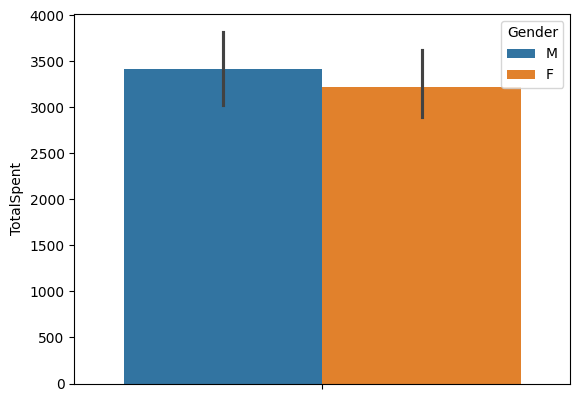

In [149]:
sns.barplot(data=Z,y="TotalSpent", hue = "Gender", estimator = np.mean)

In [163]:
Z.groupby("Gender")["No of Transactions"].mean()

Gender
F    17.825482
M    18.692884
Name: No of Transactions, dtype: float64

<Axes: ylabel='No of Transactions'>

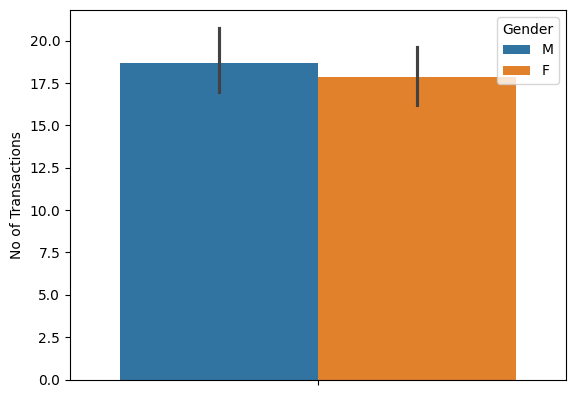

In [150]:
sns.barplot(data=Z,y="No of Transactions", hue = "Gender", estimator = np.mean)

In [162]:
Z.groupby("Gender")["AveOrderDays"].mean()

Gender
F    63.821742
M    59.469698
Name: AveOrderDays, dtype: float64

<Axes: ylabel='AveOrderDays'>

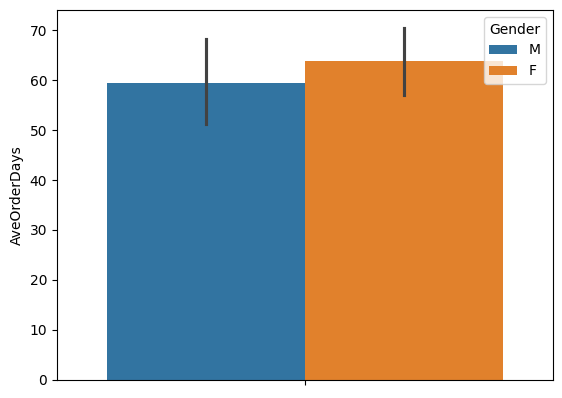

In [161]:
sns.barplot(data=Z,y="AveOrderDays", hue = "Gender", estimator = np.mean)

## Customer Location Wise analysis

In [151]:
Z["Location"].value_counts()

Location
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

In [152]:
Z.groupby("Location")["TotalSpent"].mean()

Location
California       3219.207224
Chicago          3689.237616
New Jersey       2817.318681
New York         3022.674148
Washington DC    3543.422910
Name: TotalSpent, dtype: float64

<Axes: ylabel='TotalSpent'>

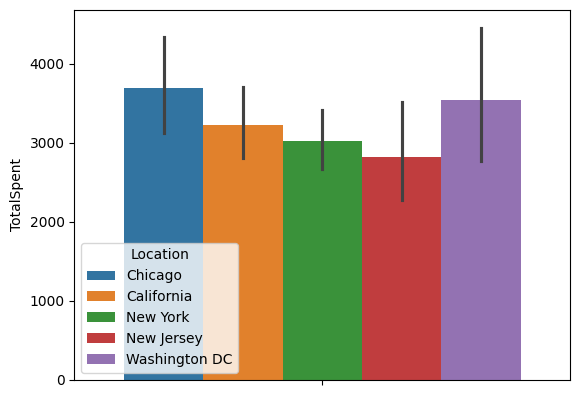

In [153]:
sns.barplot(data=Z,y="TotalSpent", hue = "Location", estimator = np.mean)

In [160]:
Z.groupby("Location")["No of Transactions"].mean()

Location
California       17.366379
Chicago          20.357456
New Jersey       15.355705
New York         17.237654
Washington DC    18.893333
Name: No of Transactions, dtype: float64

<Axes: ylabel='No of Transactions'>

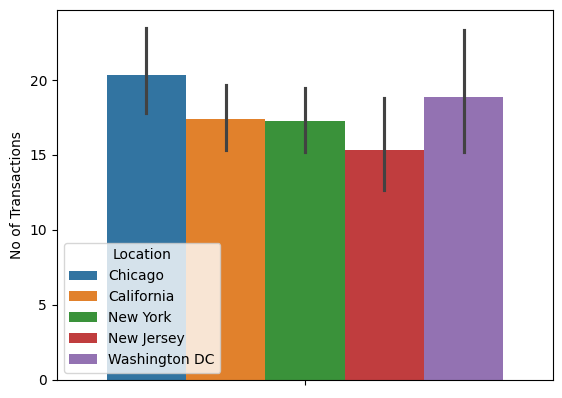

In [154]:
sns.barplot(data=Z,y="No of Transactions", hue = "Location", estimator = np.mean)

In [159]:
Z.groupby("Location")["AveOrderDays"].mean()

Location
California       65.887066
Chicago          61.735516
New Jersey       62.293613
New York         59.730125
Washington DC    53.453651
Name: AveOrderDays, dtype: float64

<Axes: ylabel='AveOrderDays'>

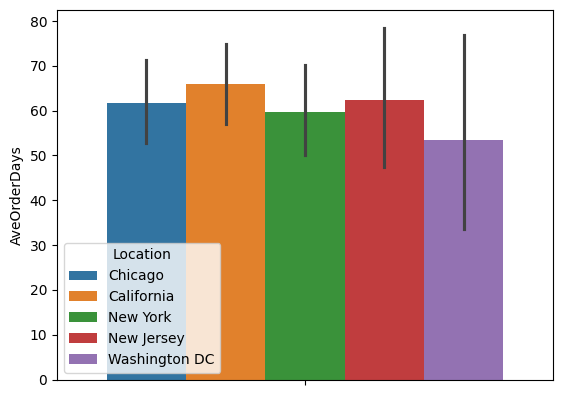

In [158]:
sns.barplot(data=Z,y="AveOrderDays", hue = "Location", estimator = np.mean)

In [156]:
Z["Tenure_Months"].describe()

count    1468.000000
mean       25.912125
std        13.959667
min         2.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: Tenure_Months, dtype: float64

In [157]:
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays,AveOrderDays,TotalSpent,AveOrderamount
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0,0.141243,38167.74663,215.636987
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0,13.500000,2957.89355,113.765137
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0,14.200000,3113.65770,207.577180
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,365.0,365.000000,7.81688,7.816880
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0,40.166667,904.97624,150.829373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0,0.200000,465.20604,93.041208
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,365.0,26.071429,2610.29915,186.449939
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,365.0,121.666667,599.78042,199.926807
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,365.0,60.833333,931.03157,155.171928
